# Computer centres at New York

# Project Description

Public facilities  like libraries usually have a computer for finding a book for general public. Users can go in the working hours to search the catalog and take a book with and without the help of staff. The dataset in question have all the list of public facilities which have computers. These computers have internet access from the government at all time. We have downloaded the dataset from the link (https://data.cityofnewyork.us/Social-Services/Citywide-Public-Computer-Centers/cuzb-dmcd) which was updated about a year ago in Sept. , 2017. Mayor's office of Chief technology officer (MOCTO) New York maintains this dataset and it has only 944 downloads to this date. Dataset is provided under the domain of 'open data access' from the city fo New York, USA. In the following section we will do the Exploratory data analysis (EDA) of the dataset in several critical steps. At each step we have have provided comments and code chunks describing the process for EDA analysis. 

# Objective

EDA analysis of the citywide public computer centres in New York State. 

# Methodology

The steps of EDA planned are

- Overview of the data

- Checking shape, number of columns and missing values

- Identifying Unique values in the data

- Deleting columns with more than 90% missing values

- Replacing the data in features (columns) with mean, max ,median values. Choice of the replace method depends upon of data.

- Data visualisation of the each categorical and numerical feature using barplot, histograms, scatter plot, maps and line graphs

- Statistical analysis of important features with the help of ANOVA, t-test and measure of central tendency after removing the outliers.

- Performing critical analysis of the interlink between features which can help the Mayor office for future decision.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes
import plotly.express as px
import folium
from folium import plugins
import missingno as msno

### Importing dataset

In [2]:
df = pd.read_table("/work/Citywide_Public_Computer_Centers.csv",
sep=',')

### setting pandas options to display all rows in the ipynb code output

In [3]:
pd.set_option('display.max_rows', 10)

### Getting overview of data using `head` function

In [4]:
df.head()

,OID,Oversight Agency,Operator Name,Location Name,Address,AddrNum,AddrDir,AddrStr,Addr_Suffix,City,...,Borough,NTA Code,NTA Name,Council Distrcit,BoroCD,Census Tract,BCTCB2010,BIN,BBL,Location
0,353,Department for the Aging,YOUNG ISRAEL PROGRAMS INC,QUEENS VALLEY NEIGHBORHOOD SENIOR CENTER,141-55 77th Avenue,141-55,NaN,77th,Avenue,Queens,...,Queens,QN37,Kew Gardens Hills,24,408,77903,40779031000,4143547,4066280084,POINT (-73.819422 40.721434)
1,294,Department for the Aging,JEWISH ASSOCIATION FOR SERVICES FOR THE AGED,COOP CITY NEIGHBORHOOD SENIOR CENTER,2049 Bartow Avenue,2049,NaN,Bartow,Avenue,Bronx,...,Bronx,BX13,Co-op City,12,210,46201,20462011022,2097466,2051410100,POINT (-73.829062 40.870509)
2,177,Queens Library,Queens Library,Flushing JBA,41-17 Main Street,41-17,NaN,Main,Street,Flushing,...,Queens,QN22,Flushing,20,407,85300,40853002000,4114282,4050430011,POINT (-73.82888469 40.75777407)
3,379,Department for the Aging,SAMUEL FIELD YM & YWHA INC,SAMUEL FIELD NEIGHBORHOOD SENIOR CENTER,58-20 Little Neck Parkway,58-20,NaN,Little Neck,Parkway,Queens,...,Queens,QN45,Douglas Manor-Douglaston-Little Neck,23,411,152902,41529023014,4173029,4083520051,POINT (-73.723273 40.760948)
4,392,Department for the Aging,SENIOR CITIZENS LEAGUE OF FLATBUSH INC,SR CITIZENS LEAGUE OF FLATBUSH NBH SR CT,870 Ocean Parkway,870,NaN,Ocean,Parkway,Brooklyn,...,Brooklyn,BK42,Flatbush,44,312,46201,30462012000,3170453,3065080006,POINT (-73.971057 40.627218000000006)


### The shape of the dataset which shows the number of rows and column is given as 

In [5]:
print('\nDataFrame Shape :', df.shape)
print('\nNumber of rows :', df.shape[0])
print('\nNumber of columns :', df.shape[1])


DataFrame Shape : (508, 70)

Number of rows : 508

Number of columns : 70


### Checking data types along with count using `info` command

In [6]:
df.describe(include=['O']).T

,count,unique,top,freq
Oversight Agency,508,7,Department for the Aging,159
Operator Name,508,135,New York Public Library,92
Location Name,508,496,Sheepshead Bay,2
Address,508,493,89-11 Merrick Boulevard,4
AddrNum,507,435,80,5
...,...,...,...,...
URL,507,388,https://www.nycgovparks.org/facilities/media-labs,33
Borough,508,5,Brooklyn,143
NTA Code,508,175,MN03,13
NTA Name,508,175,Central Harlem North-Polo Grounds,13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OID                        508 non-null    int64  
 1   Oversight Agency           508 non-null    object 
 2   Operator Name              508 non-null    object 
 3   Location Name              508 non-null    object 
 4   Address                    508 non-null    object 
 5   AddrNum                    507 non-null    object 
 6   AddrDir                    88 non-null     object 
 7   AddrStr                    508 non-null    object 
 8   Addr_Suffix                481 non-null    object 
 9   City                       508 non-null    object 
 10  State                      508 non-null    object 
 11  Postcode                   508 non-null    int64  
 12  Latitude                   508 non-null    float64
 13  Longitude                  508 non-null    float64

### Checking column names and their description

In [8]:
df.columns

Index(['OID', 'Oversight Agency', 'Operator Name', 'Location Name', 'Address',
       'AddrNum', 'AddrDir', 'AddrStr', 'Addr_Suffix', 'City', 'State',
       'Postcode', 'Latitude', 'Longitude', 'Wireline Dwn', 'Wireline Up',
       'WiFi Dwn', 'WiFi Up', 'Wi-Fi Available', 'Workstation #', 'Staffed',
       'Mon Open', 'Mon Close', 'Mon Open_2', 'Mon Close_2', 'Tue Open',
       'Tue Close', 'Tue Open_2', 'Tue Close_2', 'Wed Open', 'Wed Close',
       'Wed Open_2', 'Wed Close_2', 'Thu Open', 'Thu Close', 'Thu Open_2',
       'Thu Close_2', 'Fri Open', 'Fri Close', 'Fri Open_2', 'Fri Close_2',
       'Sat Open', 'Sat Close', 'Sat Open_2', 'Sat Close_2', 'Sun Open',
       'Sun Close', 'Language Access', 'Wheelchair Accessible',
       'Wheelchair Access Notes', 'OS Accessibility Features',
       'Open Lab Hrs Per Wk', 'Training  Hours Per Wk',
       'Supplementary Equipment', 'Device Loaning', 'Devices Loaned',
       'Access Requirements', 'Access Notes', 'URL', 'BoroCode', 'Borough

- OID = Unique identification number assigned to each center in the dataset

- Oversight agency = Name of City agency responsible overseeing the center. New York Public Library, Brooklyn Public Library, Queens Library, Department of Parks and Recreation, Department for the Aging, Department of Youth and Community Development, New York City Housing Authority; data is as reported by the Oversight Agency


- Operator_name= Name of City agency or contracted organization responsible for operating the center. In many cases, the "operator" is the same as the "oversight agency."  However, the centers overseen by the Department for the Aging, Department of Youth and Community Development and the New York City Housing Authority have agreements with third-party organizations to operate centers under their oversight.  These organizations are often called "sponsors" of the sites.  In these cases, "oversight agency" and "operator" names will be different; data is as reported by the Oversight Agency


- location_name = Name of the library, community center, senior center, or recreation center in which a computer lab or space is located

- address = Full street address where the center is located

- AddrNum = Building number component of street address where the center is located

- AddrDir = Direction component of street address where the center is located. "E." means "East," "W." means "West," "N." means "North," "S." means "South"

- AddrStr = Street name component of street address where the center is located

- Addr_Suffix = Street suffix component of street address where the center is located

- City = City in which the center is located. In some cases, "City" data for centers located in Queens was reported with a specific neighborhood name


- State = State in which the center is located. "NY" means "New York"

- Postcode = Zip code in which the center is located	

- Latitude = Latitude coordinate of center location	

- Longitude = Longitude coordinate of center location	

- Wireline_Dwn	= Download speed in megabits per second (Mbps) of wireline internet service available at the center		Mbps (megabits per second); "N/A" means there is no service at the location

- Wireline_Up= Upload speed in megabits per second (Mbps) of wireline internet service available at the center. Mbps (megabits per second); "N/A" means there is no service at the location

- Wifi_Dwn = WiFDownload speed in megabits per second (Mbps) of WiFi internet service available at the center. Mbps (megabits per second); "N/A" means there is no service at the location

- wifi_up = Upload speed in megabits per second (Mbps) of WiFi internet service available at the center. Mbps (megabits per second); "N/A" means there is no service at the location\

- wi_fi_available= Indication of whether the center offers public Wi-Fi. "Y" means "yes" and "N" means "no."	

- Workstation=	Number of computer workstations, defined as desktop or laptop computers, available for public use at the center	

- Staffed = Indication by the oversight agency of whether the center currently has staff to both a) maintain the center's technology resources in good working order, and b) support patrons' use of the center's technology resources in the form of answering questions, etc.	"Y" means "yes" and "N" means "no."	

- mon_open = Time on Mondays at which the computer center/area opens for public use, or indication that the center is closed on Mondays.		

- mon_close = Time on Mondays at which the computer center/area closes for public use, or indication that the center is closed on Mondays.

- mon_open_2 = Additional Time on Mondays at which the computer center/area opens for public use, or indication that the center is closed on Mondays.		

- Mon_Close_2	= Additional Time on Mondays at which the computer center/area closes for public use, or indication that the center is closed on Mondays.	

- Tue_Open= Time on Tuesdays at which the computer center/area opens for public use, or indication that the center is closed on Tuesdays.		

- Tue_Close= Time on Tuesdays at which the computer center/area closes for public use, or indication that the center is closed on Tuesdays.		

- Tue_Open_2	= Additional Time on Tuesdays at which the computer center/area opens for public use, or indication that the center is closed on Tuesdays.	

- Tue_Close_2	Additional Time on Tuesdays at which the computer center/area closes for public use, or indication that the center is closed on Tuesdays.		

- Wed_Open	Time on Wednesdays at which the computer center/area opens for public use, or indication that the center is closed on Wednesdays.		

- Wed_Close	Time on Wednesdays at which the computer center/area closes for public use, or indication that the center is closed on Wednesdays.	

- Wed_Open_2	Additional Time on Wednesdays at which the computer center/area opens for public use, or indication that the center is closed on Wednesdays.		

- Wed Close_2 Additional Time on Wednesdays at which the computer center/area closes for public use, or indication that the center is closed on Wednesdays.		

- Thu Open	Time on Thursdays at which the computer center/area opens for public use, or indication that the center is closed on Thursdays.		

- Thu Close	Time on Thursdays at which the computer center/area closes for public use, or indication that the center is closed on Thursdays.		

- Thu Open_2	Additional Time on Thursdays at which the computer center/area opens for public use, or indication that the center is closed on Thursdays.		

- Thu_Close_2	Additional Time on Thursdays at which the computer center/area closes for public use, or indication that the center is closed on Thursdays.		

- Fri_Open	Time on Fridays at which the computer center/area opens for public use, or indication that the center is closed on Fridays.		

- Fri_Close	Time on Fridays at which the computer center/area closes for public use, or indication that the center is closed on Fridays.		

- Fri_Open_2	Additional Time on Fridays at which the computer center/area opens for public use, or indication that the center is closed on Fridays.		

- Fri Close_2	Additional Time on Fridays at which the computer center/area closes for public use, or indication that the center is closed on Fridays.		

- Sat_Open	Time on Saturdays at which the computer center/area opens for public use, or indication that the center is closed on Saturdays.		

- Sat_Close	Time on Saturdays at which the computer center/area closes for public use, or indication that the center is closed on Saturdays.		

- Sat_Open_2	Additional Time on Saturdays at which the computer center/area opens for public use, or indication that the center is closed on Saturdays.		

- Sat_Close_2	Additional Time on Saturdays at which the computer center/area closes for public use, or indication that the center is closed on Saturdays.		

- Sun_Open	Time on Sundays at which the computer center/area opens for public use, or indication that the center is closed on Sundays.		

- Sun_Close	Time on Sundays at which the computer center/area closes for public use, or indication that the center is closed on Sundays.		

- Language_Access	Description of any resources or services provided at the center in languages other than English.		"N/A" means there are no language access resources offered at the center; data is as reported by the Oversight Agency

- Wheelchair_Accessible	Indication of whether the facility is wheelchair accessible or not.	"Y" means "yes" and "N" means "no."	Data may be "Y," "N," or "Partially".  An explanation, or follow up action where "Partially" is used is included in the following column, "Wheelchair Access Notes"; data is as reported by the Oversight Agency

- Wheelchair_Access_Notes	Further explanation of "Partially" responses to the "Facility Wheelchair Accessible? (Y/N)" column.		"N/A" means there is no further explanation for the data in the "Wheelchair Access Notes" column; data is as reported by the Oversight Agency

- OS_Accessibility_Features 	Indication of whether publicly available workstations at the facility have disability access features available through their operating system.	"OS" means "operating system."  "Y" means "yes" and "N" means "no."	

- Open_Lab_Hrs_Per_Wk	Number of hours per week that the center's computers with internet access are available to the public for open, unprogrammed use. Hours; 

- Training_Hrs_Per_Wk	Average number of hours per week that the center provides digital literacy training programs.		Hours; "0" means there are no digital literacy training programs available at the center; 

- Supplementary_Equipment = Description of equipment other than computers that is available for public use at the center.		"N/A" means there is no supplementary equipment available at the center; 

- Device Loaning	Indication of whether the center loans devices to the public to take home."N/A" means there is no take-home device loaning available at the center; 

- Devices Loaned	Type of device the center offers to the public to borrow at home."N/A" means there is no take-home device loaning available at the center; 

- Access Requirements	Description of any requirements the center imposes for public use, whether related to age, registration procedures, or other.		

- Access Notes	Indication of whether there are any temporary restrictions on access to the center, such as temporary closure for renovations."N/A" means there are no temporary restrictions on access to the center, such as temporary closure for renovations; 

- URL	Website at which more information about the center and/or operating entity can be found.

- BoroCode	Code for the New York City borough where the center is located.	"1"  means "Manhattan," "2" means "Bronx," 3" means "Brooklyn," "4" means "Queens," and "5" means "Staten Island"	

- Borough	Name of borough in which center is located		

- NTA Code	Four (4) digit code assigned to neighborhoods to differentiate NYC's five boroughs. Each NTA within NYC's 5 boroughs is given a unique value. 

- NTA Name	Neighborhood identifiers to differentiate NYC's five boroughs.Neighborhood Tabulation Areas, or NTAs, are aggregations of census tracts that are subsets of New York City's 55 Public Use Microdata Areas (PUMAs).

- Council District	Council District in which center is located.		

- BoroCD	New York City Borough plus Community Board Numbers.		

- Census Tract	Census Tract in which center is located.		

- BCTCB2010	Combined value of Borough CD and Census 2010.		

- BIN	Building Identity Number of building in which center is located.		

- BBL	Borough, Block, Lot Number in which center is located.		

- Location	Combination of the Lat and Long values shown in earlier so-labeled columns.	

### We can check the data types in each column by using `dtypes` command

In [9]:
df.dtypes.value_counts()

object     49
int64      10
float64     8
bool        3
dtype: int64

It shows that we have 49 object type columns, 10 int64, 8 float types and 3 bool variables. 

### Checking number of missing values in each column and getting sum 

There are many columns with missing values. Most of them are in the last columns of the dataframe. We can display the percentage of missing values in each column as 

In [10]:
df.isnull().sum()/len(df)*100

OID                 0.0
Oversight Agency    0.0
Operator Name       0.0
Location Name       0.0
Address             0.0
                   ... 
Census Tract        0.0
BCTCB2010           0.0
BIN                 0.0
BBL                 0.0
Location            0.0
Length: 70, dtype: float64

We can confirm our previous observation that there are columns with more than 99% missing values.

### Deleting columns with  more than 90% missing value

In the above result we realize that lots of missing values. We can check the columns which have more than 90% missing values and print names of those features

In [11]:
nan_per=df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100
useless_features=nan_per[nan_per>90].index
print('Useless features:', useless_features)

Useless features: Index(['Sat Close_2', 'Sat Open_2', 'Fri Close_2', 'Fri Open_2', 'Wed Close_2',
       'Wed Open_2', 'Mon Close_2', 'Mon Open_2', 'Thu Close_2', 'Tue Close_2',
       'Tue Open_2', 'Thu Open_2', 'Access Notes', 'Wheelchair Access Notes'],
      dtype='object')


Now we will drop all those columns which have more than 90% missing values

In [12]:
df.drop(useless_features, axis=1, inplace=True)
print('Shape of the food dataset is:', 
df.shape)

Shape of the food dataset is: (508, 56)


We can also drop some columns which are not important such as `oid` and url` etc

In [13]:
df=df.drop(['OID', 'URL','State','BoroCode','AddrDir','BCTCB2010'], 
axis=1)

After Dropping the final shape is 50 columns and 508 rows. We can check the unique values in each column below;

In [14]:
unique_values = df.nunique()
print('Count of unique values in each column :')
print(unique_values)

Count of unique values in each column :
Oversight Agency      7
Operator Name       135
Location Name       496
Address             493
AddrNum             435
                   ... 
BoroCD               60
Census Tract        371
BIN                 486
BBL                 480
Location            495
Length: 50, dtype: int64


The columns with 1 or 2 unique values are boolean variables while others have many unique values. For instance in the devices loaned column we have 2 unique values only which are chromebooks loaned and remaining are missing values. 

There are many columns with time series data which can only be converted to some useful value after using pandas `_to_datetime` command.

identifying those columns which have string data in between time series data

In [15]:

df.columns[(df.values=='Closed').any(0)].tolist()

['Mon Open',
 'Mon Close',
 'Tue Open',
 'Tue Close',
 'Wed Open',
 'Wed Close',
 'Thu Open',
 'Thu Close',
 'Fri Open',
 'Fri Close',
 'Sat Open',
 'Sat Close',
 'Sun Open',
 'Sun Close']

In [16]:
df.columns[(df.values=='By Appointment').any(0)].tolist()

['Fri Open', 'Fri Close']

### Filling the null values using bfill() and ffill() methods of pandas

In [17]:
df = df.bfill(axis='rows')
df = df.ffill(axis='rows')

Above columns have strings `Closed` and `By Appointment` in them. which needs to be replaced by something in order to convert the column to time series using pandas `to_datetime` function

### Replacing strings to integers in time series columns

In [18]:
df = df.replace('Closed',1)
df = df.replace("By Appointment",2)

In [19]:
df.columns[(df.values=='Closed').any(0)].tolist()
df.columns[(df.values=='By Appointment').any(0)].tolist()

[]

Now we have no columns with string `closed` or `by appointment`.

We can filter those columns which have time series data. Luckily in our dataset all those columns have identical column names with prefix `open` or `close`.

In [20]:
open_time_columns = df.filter(regex='Open',axis=1)
close_time_columns = df.filter(regex='Close',axis=1)

We can check if these columns have any missing value before converting them to time series. 

In [21]:
close_time_columns.isnull().sum()
open_time_columns.isnull().sum()

Mon Open               0
Tue Open               0
Wed Open               0
Thu Open               0
Fri Open               0
Sat Open               0
Sun Open               0
Open Lab Hrs Per Wk    0
dtype: int64

At this stage we will convert all those column with time series string to time series format. In this way they will have `datetime[ns]` format and easy to handle in EDA analysis.

### Converting the datatype object to datetime

In [22]:
open_time_columns['Fri Open'] = pd.to_datetime(open_time_columns['Fri Open'], errors='coerce')
open_time_columns['Mon Open'] = pd.to_datetime(open_time_columns['Mon Open'], errors='coerce')
open_time_columns['Tue Open'] = pd.to_datetime(open_time_columns['Tue Open'], errors='coerce')
open_time_columns['Wed Open'] = pd.to_datetime(open_time_columns['Wed Open'], errors='coerce')
open_time_columns['Thu Open'] = pd.to_datetime(open_time_columns['Thu Open'], errors='coerce')
open_time_columns['Sat Open'] = pd.to_datetime(open_time_columns['Sat Open'], errors='coerce')
open_time_columns['Sun Open'] = pd.to_datetime(open_time_columns['Sun Open'], errors='coerce')

close_time_columns['Fri Close'] = pd.to_datetime(close_time_columns['Fri Close'], errors='coerce')
close_time_columns['Mon Close'] = pd.to_datetime(close_time_columns['Mon Close'], errors='coerce')
close_time_columns['Tue Close'] = pd.to_datetime(close_time_columns['Tue Close'], errors='coerce')
close_time_columns['Wed Close'] = pd.to_datetime(close_time_columns['Wed Close'], errors='coerce')
close_time_columns['Thu Close'] = pd.to_datetime(close_time_columns['Thu Close'], errors='coerce')
close_time_columns['Sat Close'] = pd.to_datetime(close_time_columns['Sat Close'], errors='coerce')
close_time_columns['Sun Close'] = pd.to_datetime(close_time_columns['Sun Close'], errors='coerce')


/tmp/ipykernel_14655/904406532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_time_columns['Fri Open'] = pd.to_datetime(open_time_columns['Fri Open'], errors='coerce')
/tmp/ipykernel_14655/904406532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_time_columns['Mon Open'] = pd.to_datetime(open_time_columns['Mon Open'], errors='coerce')
/tmp/ipykernel_14655/904406532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

subtracting the open and closing time columns to get the time for each day for computer centres.

In [23]:
mon_hours = close_time_columns['Mon Close'] - open_time_columns['Mon Open'] 
tue_hours = close_time_columns['Tue Close'] - open_time_columns['Tue Open'] 
wed_hours = close_time_columns['Wed Close'] - open_time_columns['Wed Open'] 
thu_hours = close_time_columns['Thu Close'] - open_time_columns['Thu Open'] 
fri_hours = close_time_columns['Fri Close'] - open_time_columns['Fri Open']  
sat_hours = close_time_columns['Sat Close'] - open_time_columns['Sat Open']  
sun_hours = close_time_columns['Sun Close'] - open_time_columns['Sun Open']  

Since we have converted the `open` and `close` columns we can drop these columns in main dataframe

In [24]:
x = open_time_columns.columns
y = close_time_columns.columns

In [25]:
df=df.drop(x,axis=1)
df = df.drop(y,axis=1)

Our study area is located south east of USA as shown by purple dots on the map below. 

In [26]:
fig = px.scatter_geo(df,lat='Latitude',lon='Longitude', hover_name="Council Distrcit",scope='usa')
fig.update_layout(title = 'Public Computers centres in New York State', title_x=0.5)
fig.show()

Which can be shown as 

In [27]:
import folium
# Build the default map for a specific location
map = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],
tiles="openstreetmap", zoom_start=10)
map

### Comparing internet access at different centres

We plot the location of computer centres on map of New York state with the help of latitude and longitude coordinates with the colour coordinates of wifi download speeds. Only 2-3 centres have download speed of 5000 Megabytes/second which is actually 40Gb/s. 

<AxesSubplot:title={'center':'Wifi download speed in all centres'}, xlabel='Longitude', ylabel='Latitude'>

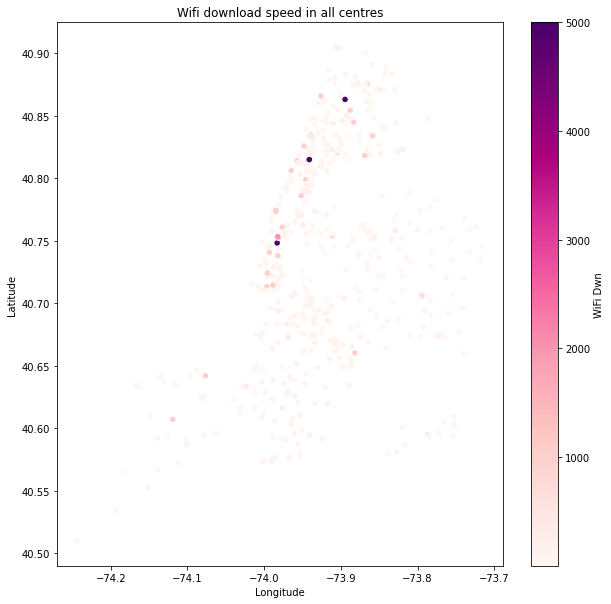

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
df.plot(x="Longitude", y="Latitude", kind="scatter", c="WiFi Dwn",
       colormap="RdPu",ax=ax,title='Wifi download speed in all centres')

We can also plot the wireline speed in the same areas. It helps us to identify if the both wifi and wireline speeds are identical in those or it varies at other locations.

<AxesSubplot:title={'center':'Internet cable download speed in all centres'}, xlabel='Longitude', ylabel='Latitude'>

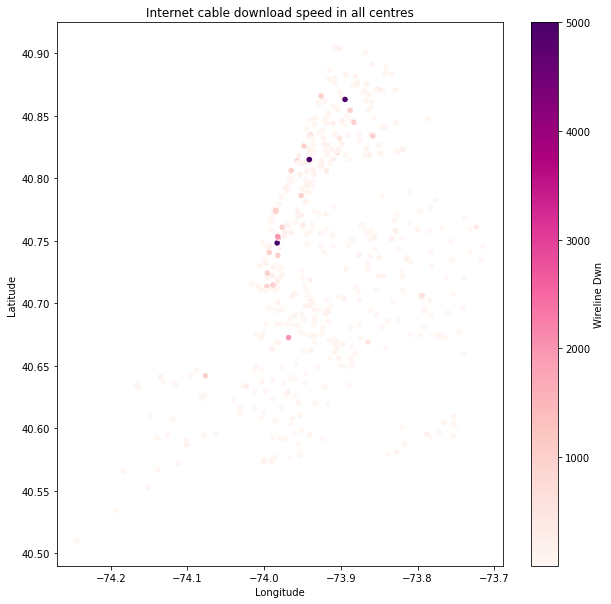

In [29]:

fig, ax = plt.subplots(figsize=(10,10))
df.plot(x="Longitude", y="Latitude",
 kind="scatter", c="Wireline Dwn",
colormap="RdPu",ax=ax,title='Internet cable download speed in all centres')

Having a closer look at the two maps above the centres with highest download speeds are identical which means that only 2-3 centres have in New York state have speed of 40 Gb/s as compared to other 505 locations. 

In [30]:
px.pie(df, values= 'Workstation #', names='Wi-Fi Available',
       title='Percentage of Computer centres with Wifi avalaible')

There are less than 6% computer centres which does not have wifi available. Let's count those centres with the help of count plot.

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


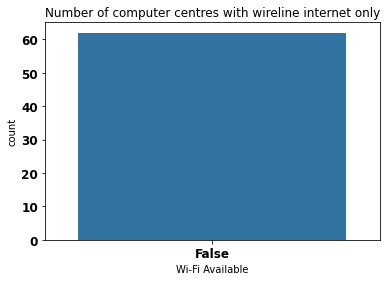

In [31]:
wifi = df[df['Wi-Fi Available']==False]
sns.countplot(x="Wi-Fi Available", data=wifi)
plt.title("Number of computer centres with wireline internet only",
 fontname="Times New Roman Bold")
plt.xticks(weight = 'bold',fontsize=12)
plt.yticks(weight = 'bold',fontsize=12)

We can plot those centres on map as well to find exactly where they are located alongwith their county.

### Location of centres without Wifi availibility

In [32]:
from folium import plugins

m = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],
tiles="openstreetmap", zoom_start=10)

wifi_lat = wifi.loc[:,['Latitude','Longitude']]

stationArr = wifi_lat.values


m.add_child(plugins.HeatMap(stationArr, radius=15))
from folium.plugins import MarkerCluster

#x=df[df['City']=='Queens']
x=df[df['Wi-Fi Available']==False]
locations = x[['Latitude','Longitude']]
locationlist = locations.values.tolist()



for coord in locationlist:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( m )

# showing map
m

### Comparison of Centres located at Avenue and Streets

Highest number of centres are located at Avenues followed by a street address in New York State according to figure below. 

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

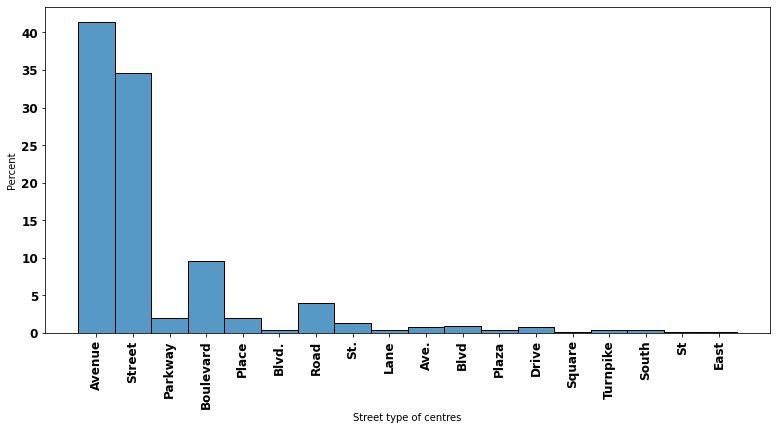

In [33]:
plt.figure(figsize=(13,6))
sns.histplot(df,x='Addr_Suffix', discrete=True,
stat="percent")
plt.xticks(rotation=90)
plt.xlabel("Street type of centres")
plt.xticks(weight = 'bold',fontsize=12)
plt.yticks(weight = 'bold',fontsize=12)


### 

### Comparison of Boolean variables

We have 3 boolean variables of wifi availability , staffed/non staffed centres and OS accessibility. We have plotted them side by side to analyse relation ship between them. 

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 720x432 with 0 Axes>

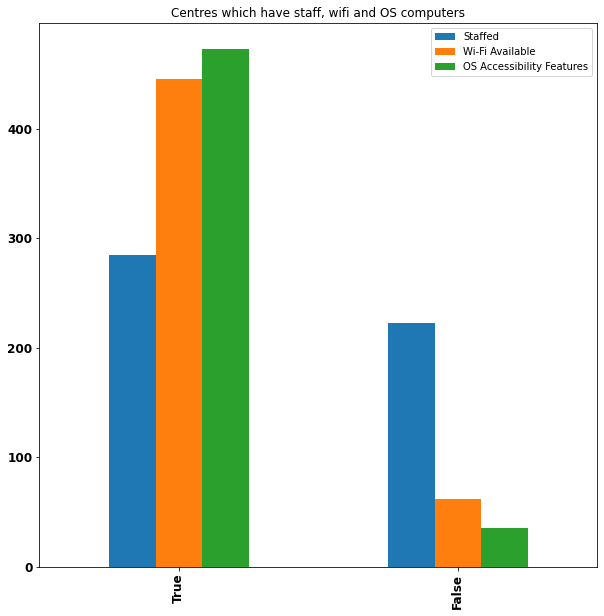

In [34]:
x = df.loc[:,['Staffed','Wi-Fi Available','OS Accessibility Features']]

plt.figure(figsize=(10,6))
x.apply(pd.value_counts).plot(kind='bar', 
title='Centres which have staff, wifi and OS computers',figsize=(10,10))
plt.xticks(weight = 'bold',fontsize=12)
plt.yticks(weight = 'bold',fontsize=12)

Above graph shows that Wifi availability is usually not dependent on staff presence. In the centres with high staff wifi may not work. In the centres with OS availability Wifi is usually available. 

### Special Persons Accessibility in Centres

We can verify that with the data for feature `wheelchair accessibility`. 

<Figure size 432x432 with 0 Axes>

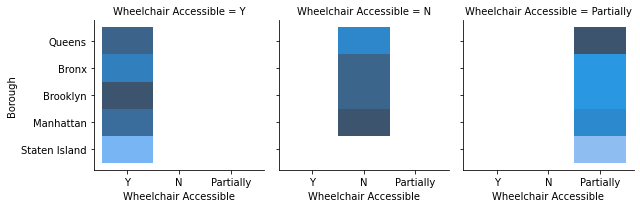

In [35]:
plt.figure(figsize=(6,6))
g=sns.FacetGrid(df,col="Wheelchair Accessible")
g.map(sns.histplot,"Wheelchair Accessible","Borough",
stat='percent')
plt.show()

In the Borough/counties all type of Wheel chair accessible centres are present except Staten Island. Brooklyn Borough has highest # of such centres. Manhattan District needs more improvement as there are lowest no. of wheel chairs accessible centres.

## Some other visualizations

In [36]:
plt.figure(figsize=(10,10))
px.bar(df,y='Device Loaning', color='Borough',
x='Oversight Agency',barmode='group')


<Figure size 720x720 with 0 Axes>

Centres which give the computer devices on loan are largely situated on Brooklyn followed Jamaica. In the agency list, Queens library have the highest ratio of giving tables, PC on loan. 

### Getting summary Statistics of the dataset

In [37]:
df.describe()

,Postcode,Latitude,Longitude,Wireline Dwn,Wireline Up,WiFi Dwn,WiFi Up,Workstation #,Training Hours Per Wk,Device Loaning,Council Distrcit,BoroCD,Census Tract,BIN,BBL
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,5.080000e+02,5.080000e+02
mean,10802.112205,40.732189,-73.919567,145.559055,121.625984,157.854331,131.363583,22.639764,5.071850,34.147638,24.141732,278.082677,38212.210630,2.848491e+06,2.742282e+09
std,559.120729,0.084847,0.082835,491.175214,493.682282,491.456450,495.275517,26.541660,6.949432,8.174373,14.701084,121.063145,34611.810014,1.285278e+06,1.228639e+09
min,10001.000000,40.509531,-74.244107,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,27.000000,1.000000,101.000000,201.000000,1.001289e+06,1.000168e+09
25%,10305.000000,40.672507,-73.967043,20.000000,6.000000,20.000000,6.000000,9.000000,1.000000,29.000000,11.000000,201.000000,14400.000000,2.004601e+06,2.024205e+09
50%,11201.000000,40.731699,-73.926943,35.500000,20.000000,44.000000,20.000000,13.000000,3.000000,30.000000,23.500000,305.000000,26250.000000,3.076724e+06,3.020265e+09
75%,11235.000000,40.806108,-73.866949,94.000000,37.000000,101.000000,40.000000,26.000000,6.500000,37.000000,36.000000,403.000000,49150.500000,4.100198e+06,4.017183e+09
max,11694.000000,40.905009,-73.714838,5000.000000,5000.000000,5000.000000,5000.000000,226.000000,62.100000,67.000000,51.000000,503.000000,157902.000000,5.157567e+06,5.078990e+09


### Training Hours offered in Boroughs

We can identify if the training hours offered are dependent upon population of borough. below plot nullify our assumptions. Trainings are offered in all counties and normal average is below 10. 

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000., 180000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

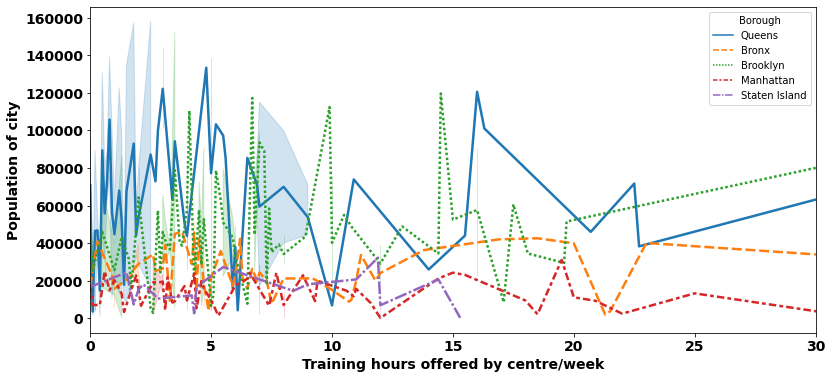

In [38]:
plt.figure(figsize=(13,6))
sns.lineplot(df['Training  Hours Per Wk'],df['Census Tract'],
style=df['Borough'],hue=df['Borough'],linewidth=2.5)
plt.xlim(0,30)
plt.xlabel("Training hours offered by centre/week",weight='bold',fontsize=14)
plt.ylabel("Population of city",weight='bold',fontsize=14)
plt.xticks(weight = 'bold',fontsize=14)
plt.yticks(weight = 'bold',fontsize=14)

We can find the average training hours/borough by

In [39]:
df.loc[:,['Borough','Training  Hours Per Wk']].groupby('Borough').mean()

,Training Hours Per Wk
Borough,
Bronx,5.321053
Brooklyn,5.298601
Manhattan,5.949573
Queens,3.719531
Staten Island,5.644000


Result depicts that average training hours are less than 6 in all boroughs. 

## Languages offered at Centres

In [40]:
Lang= df['Language Access'].str.split(',', expand=True)
Lang.nunique()

0     17
1     47
2     29
3     25
4     21
      ..
12     1
13     1
14     1
15     1
16     1
Length: 17, dtype: int64

In [41]:
Lang.columns = ['Staff','Multilingual','Spanish_Chinese',
'Korean_mandarin','Russian','Bangali','Gujrati','Hindi',
'Punjabi','Urdu','lang10','lang11','lang12',
'lang13','lang14','lang15','lang16']

List of all languages and staff assistance is given below.

In [42]:
Lang.value_counts()

Staff                                                                                                                                                                                                               Multilingual  Spanish_Chinese        Korean_mandarin         Russian   Bangali   Gujrati      Hindi    Punjabi  Urdu           lang10    lang11                 lang12     lang13     lang14   lang15  lang16
Branch displays signage in multiple languages.  Reservation and printing software supports both English and Spanish instructions.  Public Windows computers offer the following keyboard input languages:  English   Spanish       Chinese (Simplified)   Chinese (Traditional)   Russian   Bengali   Vietnamese   French   German   Arabic (101)   Italian   Polish (Programmers)   Japanese   Albanian   Korean   Hindi   Urdu     140
dtype: int64

Following graph shows the percentage of each entry for which courses are offered.

Text(0.5, 0, 'Languages offered')

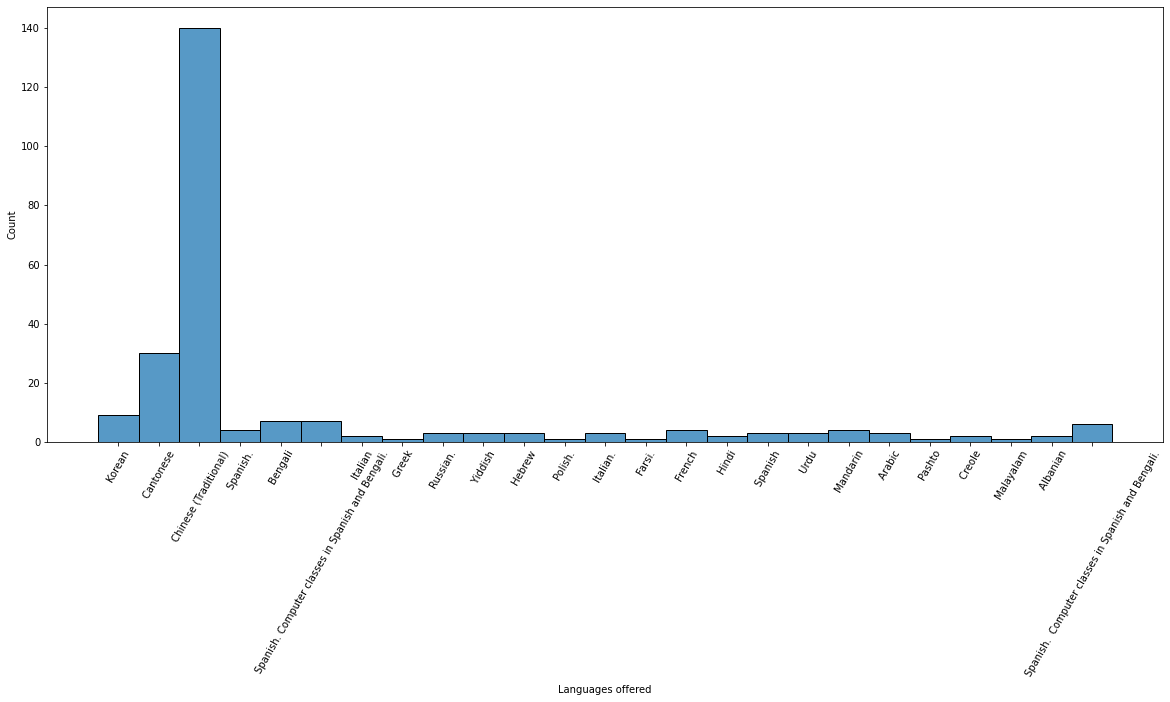

In [43]:
plt.figure(figsize=(20,8))
sns.histplot(Lang.iloc[:,3])
plt.xticks(rotation=60)
plt.xlabel("Languages offered")

Chinese is offered the highest at the centres as assistance language.  We can verify other languages as well,

### Correlation between numerical variables

<AxesSubplot:>

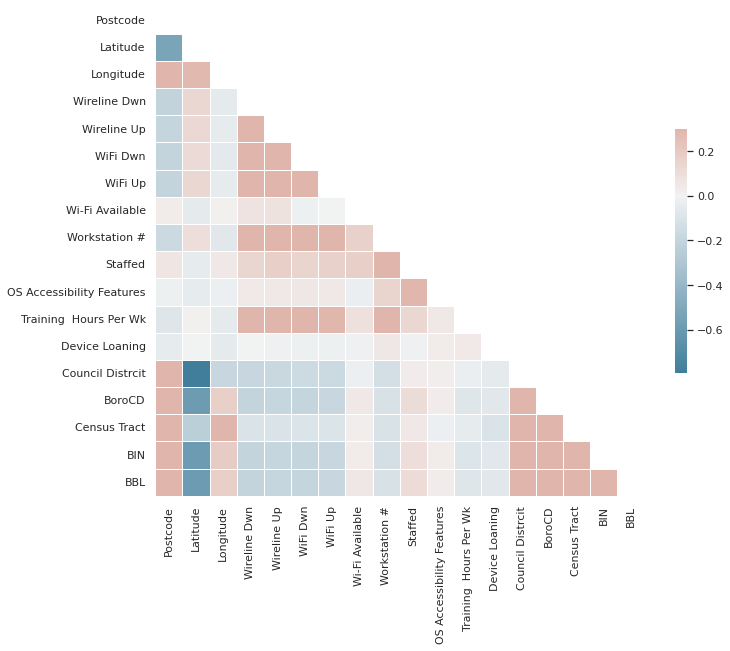

In [44]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is very low correlation between numerical variables. So they can be all used after hot encoding in machine learning algorithms. 

### Trends from the Lab opening hours on 7 days of week

In [45]:
x = sun_hours.value_counts()
y = sat_hours.value_counts()
z = mon_hours.value_counts()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

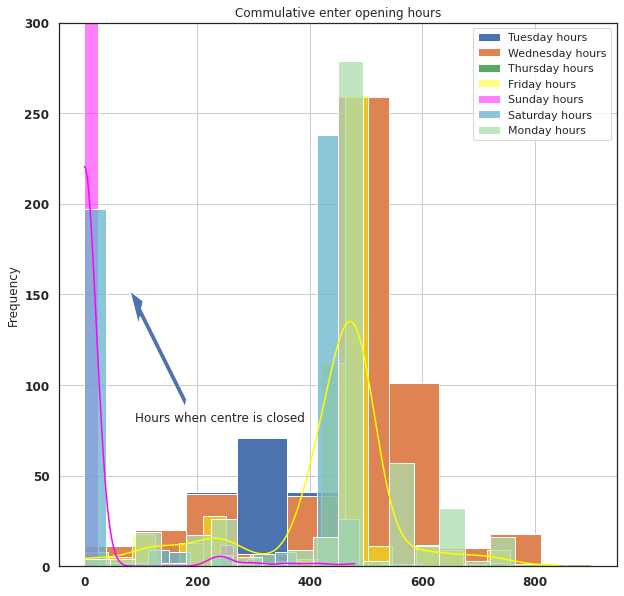

In [46]:
plt.figure(figsize=(10,10))
(tue_hours.astype('timedelta64[s]')/60).plot.hist(label='Tuesday hours')
(wed_hours.astype('timedelta64[s]')/60).plot.hist(label='Wednesday hours')
thu_hours.dt.days.hist(label='Thursday hours')
sns.histplot(fri_hours/pd.Timedelta(minutes=1), 
bins=20,label="Friday hours",kde=True,color='yellow')
sns.histplot(sun_hours/pd.Timedelta(minutes=1), 
bins=20,label="Sunday hours",kde=True,color='magenta')
sns.histplot(sat_hours/pd.Timedelta(minutes=1), 
bins=20,label="Saturday hours",color='c')
sns.histplot(mon_hours/pd.Timedelta(minutes=1), 
bins=20,label="Monday hours",color='#adddad')
plt.title("Commulative enter opening hours")
plt.ylim(0,300)
plt.arrow(180,90,-80,50,width=5,head_width=15)
plt.legend()
plt.text(90,80,"Hours when centre is closed",fontsize=12)
plt.xticks(weight = 'bold',fontsize=12)
plt.yticks(weight = 'bold',fontsize=12)

(0.0, 8.0)

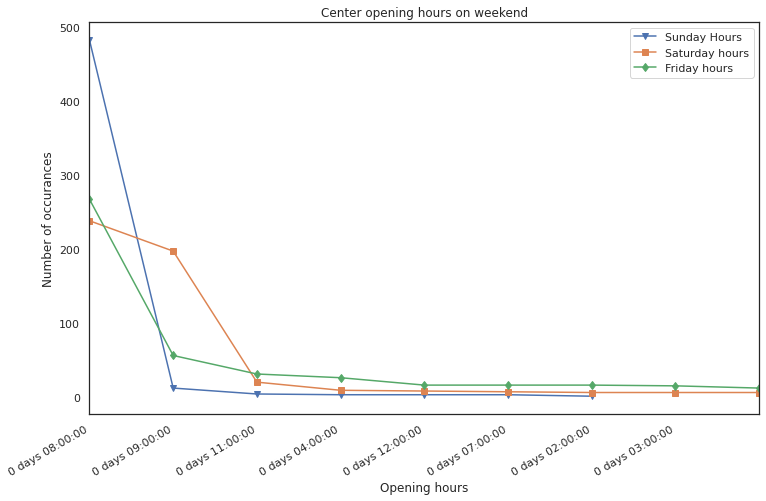

In [47]:
plt.figure(figsize=(12,8))
x.plot(label="Sunday Hours",marker='v')
y.plot(label="Saturday hours",marker='s')
z.plot(label="Friday hours",marker='d')
plt.legend()
plt.title("Center opening hours on weekend")
plt.xlabel("Opening hours")
plt.ylabel("Number of occurances")
plt.xlim(0,8)

On weekend computer centres are open for 8 hours in most cases followed by 9 hours which are mostly on Sundays. Lets compare it with week days.

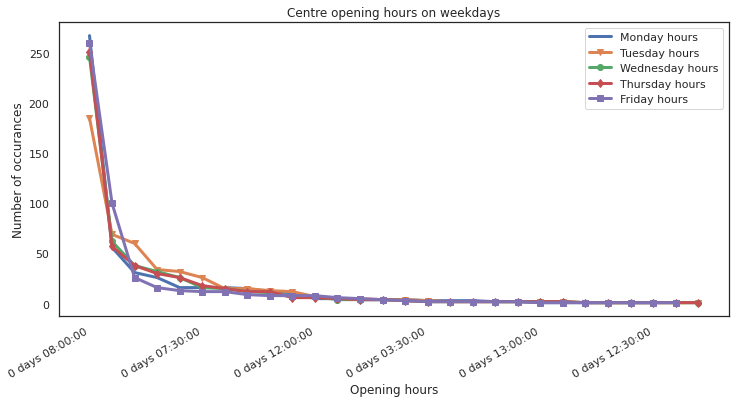

In [48]:
markers_on = [12, 17, 18, 19]
plt.figure(figsize=(12,6))
a = mon_hours.value_counts()
a.plot(label="Monday hours",linewidth=3)
b=  tue_hours.value_counts()
b.plot(label="Tuesday hours",linewidth=3,marker='v')
c= wed_hours.value_counts()
c.plot(label="Wednesday hours",marker='o',linewidth=3)
d=thu_hours.value_counts()
d.plot(label='Thursday hours',linewidth=3,marker="d")
e = fri_hours.value_counts()
e.plot(label="Friday hours",marker='s',linewidth=3,)
plt.xlabel("Opening hours")
plt.ylabel("Number of occurances")
plt.title("Centre opening hours on weekdays")
plt.legend()

On weekdays the average remains almost constant between 7.5 to 8 hours. It shows computer centres change their working hours for public convenience only on weekends. There are instances when opening hours may exceeds 12.5 hours as well.

We can check the relation between the numeric variables with the help of pairplot as well. Below graph shows that download speed increases with increase in upload speeds in wireline and wireless connections.

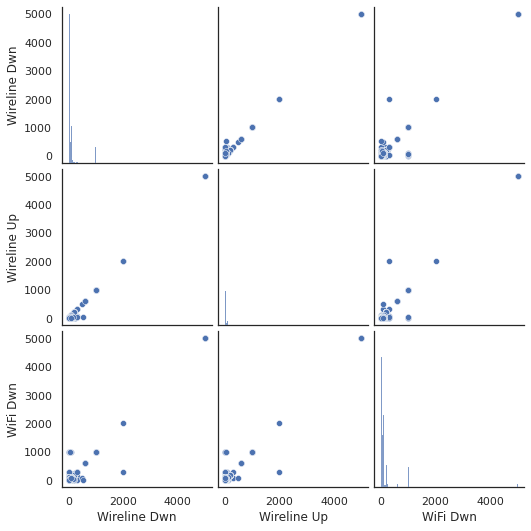

In [49]:
x = df._get_numeric_data()

sns.pairplot(x.iloc[:,3:6])

Similarly in the graph we can see that workstations are not marked in whole numbers. They can hae missing values in between. Workstations with staff are almost equalt to workstations without staff.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



(array([  0., 100., 200., 300., 400., 500.]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

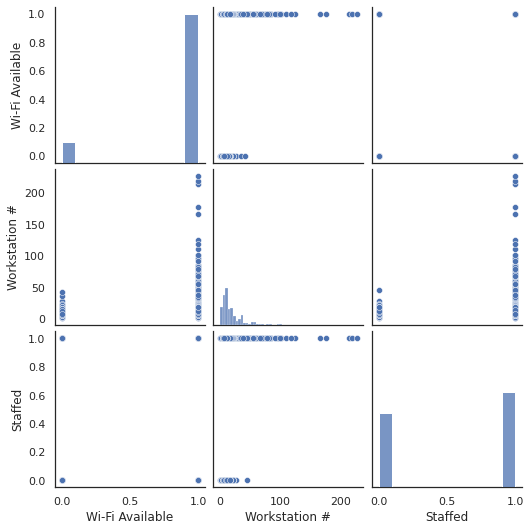

In [50]:
sns.pairplot(x.iloc[:,7:10])
plt.xticks(weight = 'bold',fontsize=12)
plt.yticks(weight = 'bold',fontsize=12)

## Summarising highly populated areas

In [51]:
# selecting all rows where popular. ismore than 100k
x = df[df['Census Tract']>100000]

### Highest populated Area in New york State

In [52]:
from folium import plugins

m = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],
tiles="openstreetmap", zoom_start=10)

Highest_populated_area = x.sort_values(by='Census Tract',ascending=False).head(1)

wifi_lat = Highest_populated_area.loc[:,['Latitude','Longitude']]
stationArr = wifi_lat.values


m.add_child(plugins.HeatMap(stationArr, radius=15))
folium.Marker([40.745151, -73.714838], popup='Highest population area in New York State').add_to(m)
m

# Conclusion

This projects deals with the citywide computer centres in New York State, USA. The computer centres are located in different counties of cities. We have been provided with locations as well as opening hours of each centre. Basic aim of the project was to do in depth EDA analysis of the dataset available on the website of open data New York city organisation. There are 70 columns and 580 rows in the original dataset. Some columns had more than 99% missing values which were deleted in the initial steps of data wrangling. We used the pandas `bfill` method to treat the missing values in the columns. 13 Time data columns are originally in string format which are converted to time series format using pandas `to_datetime` format. The string columns mainly included addresses and languages of training courses offered at the centre. Some other features included latitude, longitude and location which are helpful to analyse the location of each centre. 

We completed in exploratory data analysis of the data  and conclusions are listed below

- Less than 6% of Computer centres do not wifi connection available to the public and they only rely on wireline internet.

- Training courses are offered at centres which have an average duration of < 6 hours / week.

- Google translate is used in some centre for better communication with visitors while other centres offered official courses in multiple languages.

- Average duration of opening hours / week / centre range between 35-40 hours. 

- Centres opening on Sundays are less as compared to Saturdays. Opening hours are written alongwith strings 'Closed` and `Open` in the features which are treated by `regex` command. 

- Centres timings are around 7.5-8 hours on weekdays and it increases on weekends.

- There exists no high correlation between numerical variables of the dataset.

- Chinese/Spanish had the highest number of languages accessibility at centres. 

- Hours of Training courses are independent of population in borough. 

- Wifi availability usually does not depend upon staff availability. 

- in 3-4 centres 40 Gb/s internet download speed is offered. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8507b333-aaeb-4ead-bf95-a72a2bcf3758' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>